In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os
resource = '../resource/'


/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#load data
heloc = pd.read_csv('heloc_ds.csv')

In [3]:
#data cleaning
heloc= heloc.replace(-9,np.nan)
heloc['MaxDelqEver'] =heloc['MaxDelqEver'].replace('1', np.nan)

In [4]:
#transform categorical values to numeric values
encoder = LabelEncoder()  
heloc['RiskPerformance'] = encoder.fit_transform(heloc["RiskPerformance"])

In [5]:
heloc.dropna(inplace=True)

In [6]:
heloc['MaxDelq2PublicRecLast12M']= heloc['MaxDelq2PublicRecLast12M'].replace(6, 5)
heloc['MaxDelq2PublicRecLast12M'] =heloc['MaxDelq2PublicRecLast12M'].replace(9, 8)

heloc = heloc.replace({'MaxDelq2PublicRecLast12M' : { 0:'x', 1 : 'a', 2 : 'b', 3 : 'c',4:'d',5:'e',7:'g',8:'h'}})
heloc['MaxDelq2PublicRecLast12M'] = heloc['MaxDelq2PublicRecLast12M'].astype(object)

In [7]:
x1 = pd.get_dummies(heloc['MaxDelq2PublicRecLast12M'],prefix='MaxDelq2PublicRecLast12M')

In [8]:
heloc =heloc.replace({'MaxDelqEver' : { 0:'x',1 : 'a', 2 : 'b', 3 : 'c',4:'d',5:'e',6:'f',7:'g',8:'h',9:'i'}})

In [9]:
x2 = pd.get_dummies(heloc['MaxDelqEver'],prefix='MaxDelqEver')
heloc0 = pd.concat([heloc,x1,x2], axis=1)

In [10]:
del heloc0['MaxDelq2PublicRecLast12M']

In [11]:
del heloc0['MaxDelqEver']

In [12]:
heloc0= heloc0.replace(-8,np.nan)
heloc0= heloc0.replace(-7,np.nan)

In [13]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

heloc = imputer.fit_transform(heloc0)

heloc = pd.DataFrame(heloc)
heloc.colnames=heloc0.columns
#heloc.colnames = ['RiskPerformance','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','MaxDelq2PublicRecLast12M','MaxDelqEver','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance']

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [18]:
heloc.to_csv('heloc_edit.csv')

In [43]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(heloc, test_size=0.2, random_state=1)

In [44]:
heloc_features=train_set.copy().drop("RiskPerformance",axis=1)
heloc_labels=train_set["RiskPerformance"].copy()

In [45]:
heloc_features_test=test_set.copy().drop("RiskPerformance",axis=1)
heloc_labels_test=test_set["RiskPerformance"].copy()

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_values=scaler.fit_transform(heloc_features)
scaled_values

array([[-0.00356311,  0.40732123, -0.1991553 , ...,  1.56687681,
        -0.12001372, -0.92308069],
       [ 1.21401612,  1.43644318, -0.1991553 , ..., -0.63821227,
        -0.12001372,  1.08332892],
       [ 1.41694599, -0.58022003,  0.93486131, ..., -0.63821227,
        -0.12001372,  1.08332892],
       ...,
       [ 0.19936676,  1.3220963 , -0.68516242, ..., -0.63821227,
        -0.12001372,  1.08332892],
       [-1.42407221, -0.39310694,  0.44885419, ..., -0.63821227,
        -0.12001372, -0.92308069],
       [ 1.51841093,  1.41565284, -0.44215886, ..., -0.63821227,
        -0.12001372,  1.08332892]])

In [47]:
#build pipeline to apply logistic regression, random forest, gradient boosting classifier, and LDA model 

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree   
pipelines = {
    'l2': make_pipeline(StandardScaler(), LogisticRegression(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
    'lda': LinearDiscriminantAnalysis()
}

In [49]:
l2_hyperparams = {
    'logisticregression__C': np.linspace(1e-3, 1e3, 10)
}

In [50]:
rf_hyperparams = {
    'randomforestclassifier__n_estimators': [10, 15, 25, 35, 50, 60],
    'randomforestclassifier__max_features': ['auto', 'sqrt', .33],
    'randomforestclassifier__max_depth': [1, 3, 5, 7]
}

In [82]:
gb_hyperparams = {
    'gradientboostingclassifier__n_estimators': [25, 50, 80, 100, 200],
    'gradientboostingclassifier__learning_rate': [.05, .1, .2,.5,1], 
    'gradientboostingclassifier__max_depth': [1,3,5]
}

In [83]:
lda_hyperparams = {}

In [84]:
hyperparameters = {
    'l2': l2_hyperparams,
    'rf': rf_hyperparams,
    'gb': gb_hyperparams,
    'lda': lda_hyperparams
}

In [85]:
from sklearn.model_selection import GridSearchCV
# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, recall_score, precision_score

In [86]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 5, n_jobs = -1)
    
    # Fit model on X_train, y_train
    model.fit(X = heloc_features, y = heloc_labels)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{} has been fitted'.format(name))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(sel

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
 

l2 has been fitted


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = mi

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_j

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


rf has been fitted
gb has been fitted


/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


lda has been fitted


/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [87]:
for model in fitted_models: #.84.925.92.838
    print(model, fitted_models[model].best_score_)

l2 0.7363083164300203
rf 0.7322515212981744
gb 0.7349137931034483
lda 0.7350405679513184


In [96]:
import matplotlib.pyplot as plt

l2 0.7861683838171452
rf 0.7897706892926493
gb 0.7922010859482257
lda 0.7889502500484431


l2 0.7363083164300203
rf 0.7322515212981744
gb 0.7349137931034483
lda 0.7350405679513184


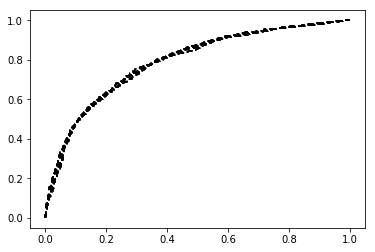

In [97]:
for model in fitted_models:
    #create class probabilities
    pred = fitted_models[model].predict_proba(heloc_features_test)
    pred = [Class[1] for Class in pred]
    
    #create fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(heloc_labels_test, pred)
    
    #calculate auc
    mod_auc = auc(fpr, tpr)
    print(plt.plot(fpr,tpr,'k--',label='mean ROC(area=%0.2f)'%mod_auc,lw=2))
    print(model, mod_auc)
    
print('\n')    
for model in fitted_models: 
    print(model, fitted_models[model].best_score_)

In [90]:
acc = []
for model in fitted_models:
    acc.append(accuracy_score(heloc_labels_test, fitted_models[model].predict(heloc_features_test)))
    print(model, accuracy_score(heloc_labels_test, fitted_models[model].predict(heloc_features_test)))

l2 0.7110998479472884
rf 0.7212366953877344
gb 0.7207298530157121
lda 0.7197161682716675


In [91]:
rec = []
for model in fitted_models:
    rec.append(recall_score(heloc_labels_test, fitted_models[model].predict(heloc_features_test)))
    print(model, recall_score(heloc_labels_test, fitted_models[model].predict(heloc_features_test)))

l2 0.7070815450643777
rf 0.6995708154506438
gb 0.7124463519313304
lda 0.7135193133047211


In [92]:
prec = []
for model in fitted_models: 
    prec.append(precision_score(heloc_labels_test, fitted_models[model].predict(heloc_features_test)))
    print(model, precision_score(heloc_labels_test, fitted_models[model].predict(heloc_features_test)))

l2 0.6893305439330544
rf 0.7071583514099783
gb 0.7011615628299894
lda 0.6992639327024185


In [93]:
from sklearn.metrics import f1_score
f = []
for model in fitted_models: 
    f.append(f1_score(heloc_labels_test, fitted_models[model].predict(heloc_features_test)))
    print(model, f1_score(heloc_labels_test, fitted_models[model].predict(heloc_features_test)))

l2 0.698093220338983
rf 0.703344120819849
gb 0.7067589143161256
lda 0.7063197026022304


In [94]:
models = pd.DataFrame({
    'Accuracy Score': acc,
    'Recall Score' : rec,
    'F1 Score' : f,
    'Precision Score' : prec
})
models.index = ['Logistic Regression', 'Random Forest','Gradient Boosting Classifier', 'LDA']
models

,Accuracy Score,Recall Score,F1 Score,Precision Score
Logistic Regression,0.711100,0.707082,0.698093,0.689331
Random Forest,0.721237,0.699571,0.703344,0.707158
Gradient Boosting Classifier,0.720730,0.712446,0.706759,0.701162
LDA,0.719716,0.713519,0.706320,0.699264


In [81]:
#decision tree

from sklearn import tree                         # import the decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=7)   # intialize tree, set maximal depth 7
tree1 = clf.fit(heloc_features, heloc_labels)    # train classifer

In [294]:
pred = tree1.predict_proba(heloc_features_test)
pred = [Class[1] for Class in pred]
pred

from sklearn.model_selection import GridSearchCV
param_grid = {'max_features':range(1,20),'max_depth':range(1,50)}
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(heloc_features, heloc_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=7,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 50),
                         'max_features': range(1, 20)},
             pre_dispatch='2*n_

In [295]:
cvres = grid_search.cv_results_ # the variable that stores the grid search results
grid_search.best_score_ , grid_search.best_params_

(0.7170385395537525, {'max_depth': 5, 'max_features': 15})

In [298]:
#KNN
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1,2,3,4,5]}
KNN_clf = neighbors.KNeighborsClassifier()
grid_search = GridSearchCV(KNN_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(heloc_features, heloc_labels)

cvres = grid_search.cv_results_

grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 5}, 0.6765973630831643)